### Module을 불러오고 장비확인

In [140]:
!pip install seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
import torch
from torchvision import datasets
import torchvision.transforms as transforms

import torch.optim as optim
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from torch.utils.data import DataLoader, Dataset

import seaborn as sns

In [2]:
class TensorData(Dataset):
    # 외부에 있는 데이터를 가져오기 위해 외부에서 데이터가 들어올 수 있도록, x_data, y_data 변수를 지정
    def __init__(self, x_data, y_data):
        #들어온 x는 tensor형태로 변환
        self.x_data = torch.FloatTensor(x_data)
        # tensor data의 형태는 (배치사이즈, 채널사이즈, 이미지 너비, 높이)의 형태임
        # 따라서 들어온 데이터의 형식을 permute함수를 활용하여 바꾸어주어야함.
        # 아래는 이미지용
        #self.x_data = self.x_data.permute(0,3,1,2)  # 인덱스 번호로 바꾸어주는 것 # 이미지 개수, 채널 수, 이미지 너비, 높이
        self.y_data = torch.FloatTensor(y_data) # float tensor / long tensor 로 숫자 속성을 정해줄 수 있음
        self.len = self.y_data.shape[0]

    # x,y를 튜플형태로 바깥으로 내보내기
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [3]:

class NormalTransform():

    def __init__(self, mean, std):
        self.data_transform = transforms.Compose([
            transforms.Normalize(self,mean,std),
        ])

    def __call__(self, img):
        return self.data_transform(img)

### 딥러닝 모델 설계 장비 확인

In [4]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 1.11.0  Device: cuda


### 데이터 전처리

In [5]:
df1  = pd.read_csv(".\colonoscopy\history\exp_20220413_131808.csv")

In [6]:
df2  = pd.read_csv(".\colonoscopy\history\exp_20220413-134511.csv")

In [7]:
df3  = pd.read_csv(".\colonoscopy\history\exp_20220413-141532.csv")

In [8]:
test_df  = pd.read_csv(".\colonoscopy\history\exp_20220413-155652.csv")

In [9]:
df1

,time,.header.seq,.header.stamp.secs,.header.stamp.nsecs,.header.frame_id,.joy_x,.joy_y,.joy_r,.joy_f,.joy_fs
0,2022/04/13/13:17:22.388795,1,1649823442,388674497,NaN,-0.001953,0.629292,0.0,0.082369,4.0
1,2022/04/13/13:17:22.453359,2,1649823442,452596426,NaN,-0.007996,0.633351,0.0,0.024751,1.0
2,2022/04/13/13:17:22.516762,3,1649823442,516623497,NaN,-0.016449,0.644917,0.0,-0.000000,0.0
3,2022/04/13/13:17:22.580912,4,1649823442,580574274,NaN,-0.017762,0.661519,0.0,-0.000000,0.0
4,2022/04/13/13:17:22.644906,5,1649823442,644766807,NaN,-0.020356,0.679098,0.0,-0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
658,2022/04/13/13:18:04.498635,659,1649823484,498252391,NaN,0.000000,0.000000,-0.0,-0.000000,0.0
659,2022/04/13/13:18:04.562541,660,1649823484,562239408,NaN,0.000000,0.000000,-0.0,-0.000000,0.0
660,2022/04/13/13:18:04.626632,661,1649823484,626288175,NaN,0.000000,0.000000,-0.0,-0.000000,0.0
661,2022/04/13/13:18:04.690758,662,1649823484,690424919,NaN,0.000000,0.000000,-0.0,-0.000000,0.0


In [10]:
index = [".joy_x", ".joy_y"]

In [11]:
df1.index

RangeIndex(start=0, stop=663, step=1)

In [12]:
df1 = df1[index]

In [13]:
df1

,.joy_x,.joy_y
0,-0.001953,0.629292
1,-0.007996,0.633351
2,-0.016449,0.644917
3,-0.017762,0.661519
4,-0.020356,0.679098
...,...,...
658,0.000000,0.000000
659,0.000000,0.000000
660,0.000000,0.000000
661,0.000000,0.000000


In [14]:
df2 = df2[index]

In [15]:
df3 = df3[index]

In [16]:
test_df = test_df[index]

In [17]:
label1 = pd.read_csv(".\colonoscopy\labels\exp_20220413-131808.csv")

In [18]:
label2 = pd.read_csv(".\colonoscopy\labels\exp_20220413-134511.csv")

In [19]:
label3 = pd.read_csv(".\colonoscopy\labels\exp_20220413-141532.csv")

In [20]:
test_label = pd.read_csv(".\colonoscopy\labels\exp_20220413-154612.csv")

In [21]:
label_index = ["X","Y"]

In [22]:
label1 = label1[label_index]

In [23]:
label1

,X,Y
0,325,469
1,324,469
2,324,469
3,324,469
4,324,469
...,...,...
658,12,467
659,12,467
660,11,473
661,9,474


In [24]:
label2 = label2[label_index]

In [25]:
label3 = label3[label_index]

In [26]:
test_label = test_label[label_index]

In [27]:
df_x1 = np.array(df1[".joy_x"])
df_x2 = np.array(df2[".joy_x"])
df_x3 = np.array(df3[".joy_x"])
df_xt = np.array(test_df[".joy_x"])

In [28]:
df_y1 = np.array(df1[".joy_y"])
df_y2 = np.array(df2[".joy_y"])
df_y3 = np.array(df3[".joy_y"])
df_yt = np.array(test_df[".joy_y"])

In [29]:
label_x1 = np.array(label1["X"])
label_x2 = np.array(label2["X"])
label_x3 = np.array(label3["X"])
label_xt = np.array(test_label["X"])

In [30]:
label_y1 = np.array(label1["Y"])
label_y2 = np.array(label2["Y"])
label_y3 = np.array(label3["Y"])
label_yt = np.array(test_label["Y"])

### input : pixel -----> output : joystick

#### normal

In [31]:
def n_in(x):
    temp = (x+1)/2
    return temp
def n_out_x(y):
    temp = y/640
    return temp
def n_out_y(y):
    temp = y/480
    return temp

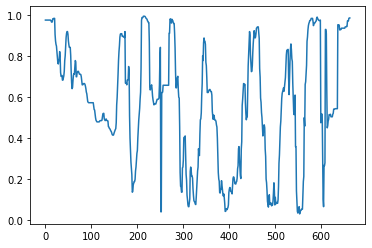

In [32]:
df_x_n1,df_x_n2,df_x_n3,df_xt_n = n_in(df_x1),n_in(df_x2),n_in(df_x3),n_in(df_xt)
df_y_n1,df_y_n2,df_y_n3,df_yt_n = n_in(df_y1),n_in(df_y2),n_in(df_y3),n_in(df_yt)

label_x_n1,label_x_n2,label_x_n3,label_xt_n, = n_out_x(label_x1),n_out_x(label_x2),n_out_x(label_x3),n_out_x(label_xt)
label_y_n1,label_y_n2,label_y_n3,label_yt_n, = n_out_y(label_y1),n_out_y(label_y2),n_out_y(label_y3),n_out_y(label_yt)
#df_y_n = (df_y - np.min(df_y))/np.ptp(df_y);
#label_x_n = (label_x - np.min(label_x))/np.ptp(label_x);
#label_y_n = (label_y - np.min(label_y))/np.ptp(label_y);
plt.plot(label_y_n1)

#### squence

In [33]:
s = 9

In [34]:
len(df_x1)-s+1,len(df_x2)-s+1,len(df_x3)-s+1

(655, 733, 705)

In [35]:
temp_x = torch.zeros(len(df_x1)-s+1+len(df_x2)-s+1,s,2)
temp_y = torch.zeros(len(df_x1)-s+1+len(df_x2)-s+1,1,2)

temp_xt = torch.zeros(len(df_x3)-s+1,s,2)
temp_yt = torch.zeros(len(df_x3)-s+1,1,2)

# train
#x
for i in range(0,len(df_x1)-s+1):
    temp_x[i]=np.transpose(torch.tensor([label_x_n1[i:i+s],label_y_n1[i:i+s]]))
for i in range(0,len(df_x2)-s+1):
    temp_x[i+len(df_x1)-s+1]=np.transpose(torch.tensor([label_x_n2[i:i+s],label_y_n2[i:i+s]]))
#for i in range(0,len(df_x3)-15+1):
#    temp_x[i+len(df_x1)-15+1+len(df_x2)-15+1]=np.transpose(torch.tensor([label_x_n3[i:i+15],label_y_n3[i:i+15]]))
    
#y

for i in range(0,len(df_x1)-s+1):
    temp_y[i] = torch.tensor([df_x_n1[i+s-1].item(),df_y_n1[i+s-1].item()])
for i in range(0,len(df_x2)-s+1):
    temp_y[i+len(df_x1)-s+1] = torch.tensor([df_x_n2[i+s-1].item(),df_y_n2[i+s-1].item()])
#for i in range(0,len(df_x3)-15+1):
#    temp_y[i+len(df_x1)-15+1+len(df_x2)-15+1] = torch.tensor([df_x_n3[i+14:i+15].item(),df_y_n3[i+14:i+15].item()])

# test
for i in range(0,len(df_x3)-s+1):
    temp_xt[i]=np.transpose(torch.tensor([label_x_n3[i:i+s],label_y_n3[i:i+s]]))
    
for i in range(0,len(df_x3)-s+1):
    temp_yt[i] = torch.tensor([df_x_n3[i+s-1].item(),df_y_n3[i+s-1].item()])
    
    

C:\Users\raist\Miniconda3\envs\machin\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:210.)
  # Remove the CWD from sys.path while we load stuff.


In [36]:
temp_xt.size()

torch.Size([705, 9, 2])

### dataset 생성

In [37]:
train_data = TensorData(temp_x, temp_y)

In [38]:
BATCH_SIZE = 10

train = TensorData(temp_x, temp_y)
val = TensorData(temp_xt[:int(len(temp_xt)*0.5)],temp_yt[:int(len(temp_xt)*0.5)])
test = TensorData(temp_xt[int(len(temp_xt)*0.5):],temp_yt[int(len(temp_xt)*0.5):])

train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=BATCH_SIZE, shuffle=False)
val_loader = torch.utils.data.DataLoader(dataset=val, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=BATCH_SIZE, shuffle=False)

In [39]:
val.y_data.size()

torch.Size([352, 1, 2])

In [40]:
#train_data_x = TensorData(df_x_n, label_x_n)

In [41]:
#train_data_y = TensorData(df_y_n, label_y_n)

### 모델 생성

In [42]:
s

9

In [43]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self,kernel = 5,in_channel=2, out_channel=2,out_channels=32,middle=1024,final = 1024):
        super(Model, self).__init__()
        self.conv1d_1 = nn.Conv1d(in_channels=in_channel,
                                   out_channels=out_channels,
                                   kernel_size = kernel,
                                   stride = 1)

        self.fc3 = nn.Linear((9-kernel+1)*out_channels,middle) # s-kernel
        self.fc2 = nn.Linear(middle,final)
        self.fc1 = nn.Linear(final,out_channel)
            
        self.relu = nn.ReLU()
        
        self.sigmoid = nn.Sigmoid()
            
        self.dropout = nn.Dropout(0.25)
        self.flat = nn.Flatten()
        
    def forward(self,x): 
        # Raw x shape : (B, S, F)
        # Shape : (B, F, S)
        #print(x.size())
        x = x.transpose(1,2)
        
        # Shape : (B, F, S) == (B, C, S)
        x = self.conv1d_1(x)
        # Shape : (B, C, S) 
        #print(x.size())
        x = self.flat(x)
        #x = x.transpose(1,2)
        x = self.fc3(x)
        #print(x.size())
        #x = self.relu(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc1(x)
        #print(x.size())
                     
                    
                     
        
        return x



### 가중치 초기화

#### 초기화를 위한 함수 만들기

In [44]:
def init_constants(m):
    if isinstance(m, nn.Linear):
        nn.init.constant_(m.weight.data,0)
        nn.init.constant_(m.bias.data, 0)
        
def init_normal(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0, 1.0)
        nn.init.normal_(m.bias, 0, 1.0)

def init_xaiver(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight, 1.0)

        
def init_kaiming(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, 0, mode='fan_in', nonlinearity='leaky_relu')

### 학습하기


In [45]:
def training_epoch(train_loader, network, loss_func, optimizer,scheduler, epoch):
    train_losses = []
    train_correct = 0
    log_interval = 300
    
    
    for batch_idx, (xb, label) in enumerate(train_loader):       
        
        xb, label = xb.to(device), label.to(device)
        #print(xb)
        batch_size = xb.size()[0]
        #xb = xb.view(batch_size,-1)
        label = label.view(batch_size,-1)
        #print(label.size())
        # 미분값의 초기화
        optimizer.zero_grad()
        #xb = xb.view(xb.shape[0],1)
        #Forward propagation 계산
        outputs = network(xb)
        
        # MSE 함수로 로스 구하기

        loss = loss_func(outputs,label)
        train_losses.append(loss.item())

        # Gradinet 구하기
        loss.backward()

        # weight값 update 하기
        optimizer.step()
        #scheduler.step()

        # 학습 상황 출력
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.2f}%)]\tLoss: {:.6f}'
                  .format(epoch+1, batch_idx * len(label), len(train_loader.dataset),100. * batch_idx / len(train_loader),
                          loss.item()))
            print("lr: ", optimizer.param_groups[0]['lr'])
            
    return train_losses

In [46]:
def test_epoch(test_loader, network, loss_func, val = False):
    correct = 0
    
    test_losses = []
    
    with torch.no_grad():
        for batch_idx, (xb, label) in enumerate(test_loader):
            xb, label = xb.to(device), label.to(device)
            batch_size = xb.size()[0]
            #print(xb.size())
            #xb = xb.view(batch_size,-1)
            #print(label.size())
            label = label.view(batch_size,-1)
            #print(label.size())
            #image = image.view([-1 , 1, 5])
            # Forward propagration 계산하기.
            outputs= network(xb)

            # MSE 함수를 적용하여 loss를 구하기
            loss = loss_func(outputs, label)
            test_losses.append(loss.item())
            avg_loss = np.mean(test_losses)


        #중간결과 출력
        if val is True:
            print('Validation set: Loss: {:.5f}\n'.format(avg_loss))
        
        else:
            print('Test set: Loss: {:.5f}\n'.format(avg_loss))
        
    return test_losses


### 정의된 함수로 학습 함수 만들기

In [47]:
def training(network, learning_rate = 0.001, epoches = 100):
    
    
    cls_loss = torch.nn.MSELoss().to(device)
    optimizer =torch.optim.Adam(network.parameters(),learning_rate)
#    scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer,
#                                        lr_lambda=lambda epoch: 0.95 ** epoch)

#    optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate, momentum=0.9)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

    train_losses_per_epoch = []
    val_losses_per_epoch = []
    test_losses_per_epoch = []
  
    for epoch in range(epoches):
                
        # 모델를 학습 중이라고 선언하기
        network.train()
        
        train_losses = training_epoch(train_loader,network,cls_loss,optimizer,scheduler, epoch)
        
        # epoch 별로 loss 평균값, 정확도 구하기
        average_loss = np.mean(train_losses)
        train_losses_per_epoch.append(average_loss)
        
        
        # epoch 별로 정확도 출력
        print('\nTraining set: Loss {:.6f}'.format(average_loss))

        
        ### 학습 중에 test 결과 보기
        
        # 모델 test 중인 것을 선언하기
        network.eval()
        
        correct = 0
        with torch.no_grad():
            val_losses = test_epoch(val_loader, network, cls_loss, True)

        val_losses_per_epoch.append(np.mean(val_losses))
        scheduler.step(np.mean(val_losses))
    with torch.no_grad():
        test_losses = test_epoch(test_loader, network, cls_loss, False)
        
    
        
    return train_losses_per_epoch,val_losses_per_epoch


### x 훈련

In [48]:
model1 = Model(kernel=7,out_channels=16,middle =512,final=256)
model1 = model1.cuda()
model1 = model1.apply(init_kaiming)     # relu
#model1 = model1.apply(init_xaiver)      # sigmoid
loss = nn.MSELoss()


In [49]:

train_loss, val_loss  = training(model1,0.0005,200)

Train Epoch: 1 [0/1388 (0.00%)]	Loss: 1.963759
lr:  0.0005

Training set: Loss 0.158227
Validation set: Loss: 0.17015

Train Epoch: 2 [0/1388 (0.00%)]	Loss: 0.038293
lr:  0.0005

Training set: Loss 0.044510
Validation set: Loss: 0.05817

Train Epoch: 3 [0/1388 (0.00%)]	Loss: 0.023248
lr:  0.0005

Training set: Loss 0.035743
Validation set: Loss: 0.03165

Train Epoch: 4 [0/1388 (0.00%)]	Loss: 0.011626
lr:  0.0005

Training set: Loss 0.033823
Validation set: Loss: 0.02941

Train Epoch: 5 [0/1388 (0.00%)]	Loss: 0.008502
lr:  0.0005

Training set: Loss 0.031582
Validation set: Loss: 0.03609

Train Epoch: 6 [0/1388 (0.00%)]	Loss: 0.006296
lr:  0.0005

Training set: Loss 0.028828
Validation set: Loss: 0.05424

Train Epoch: 7 [0/1388 (0.00%)]	Loss: 0.006394
lr:  0.0005

Training set: Loss 0.028947
Validation set: Loss: 0.04326

Train Epoch: 8 [0/1388 (0.00%)]	Loss: 0.009022
lr:  0.0005

Training set: Loss 0.028136
Validation set: Loss: 0.04499

Train Epoch: 9 [0/1388 (0.00%)]	Loss: 0.011722
l


Training set: Loss 0.018792
Validation set: Loss: 0.04108

Train Epoch: 67 [0/1388 (0.00%)]	Loss: 0.010046
lr:  5.000000000000002e-09

Training set: Loss 0.019475
Validation set: Loss: 0.04108

Train Epoch: 68 [0/1388 (0.00%)]	Loss: 0.009890
lr:  5.000000000000002e-09

Training set: Loss 0.019313
Validation set: Loss: 0.04109

Train Epoch: 69 [0/1388 (0.00%)]	Loss: 0.009016
lr:  5.000000000000002e-09

Training set: Loss 0.018577
Validation set: Loss: 0.04109

Train Epoch: 70 [0/1388 (0.00%)]	Loss: 0.009991
lr:  5.000000000000002e-09

Training set: Loss 0.019241
Validation set: Loss: 0.04109

Train Epoch: 71 [0/1388 (0.00%)]	Loss: 0.002739
lr:  5.000000000000002e-09

Training set: Loss 0.019478
Validation set: Loss: 0.04109

Train Epoch: 72 [0/1388 (0.00%)]	Loss: 0.006326
lr:  5.000000000000002e-09

Training set: Loss 0.019029
Validation set: Loss: 0.04109

Train Epoch: 73 [0/1388 (0.00%)]	Loss: 0.005312
lr:  5.000000000000002e-09

Training set: Loss 0.018771
Validation set: Loss: 0.04


Training set: Loss 0.019313
Validation set: Loss: 0.04112

Train Epoch: 128 [0/1388 (0.00%)]	Loss: 0.005455
lr:  5.000000000000002e-09

Training set: Loss 0.018786
Validation set: Loss: 0.04112

Train Epoch: 129 [0/1388 (0.00%)]	Loss: 0.007216
lr:  5.000000000000002e-09

Training set: Loss 0.019651
Validation set: Loss: 0.04112

Train Epoch: 130 [0/1388 (0.00%)]	Loss: 0.003865
lr:  5.000000000000002e-09

Training set: Loss 0.018937
Validation set: Loss: 0.04112

Train Epoch: 131 [0/1388 (0.00%)]	Loss: 0.008335
lr:  5.000000000000002e-09

Training set: Loss 0.018400
Validation set: Loss: 0.04112

Train Epoch: 132 [0/1388 (0.00%)]	Loss: 0.008813
lr:  5.000000000000002e-09

Training set: Loss 0.019099
Validation set: Loss: 0.04112

Train Epoch: 133 [0/1388 (0.00%)]	Loss: 0.005534
lr:  5.000000000000002e-09

Training set: Loss 0.018926
Validation set: Loss: 0.04112

Train Epoch: 134 [0/1388 (0.00%)]	Loss: 0.005473
lr:  5.000000000000002e-09

Training set: Loss 0.019458
Validation set: Los


Training set: Loss 0.018694
Validation set: Loss: 0.04115

Train Epoch: 189 [0/1388 (0.00%)]	Loss: 0.006525
lr:  5.000000000000002e-09

Training set: Loss 0.018739
Validation set: Loss: 0.04115

Train Epoch: 190 [0/1388 (0.00%)]	Loss: 0.008245
lr:  5.000000000000002e-09

Training set: Loss 0.019136
Validation set: Loss: 0.04115

Train Epoch: 191 [0/1388 (0.00%)]	Loss: 0.010483
lr:  5.000000000000002e-09

Training set: Loss 0.018766
Validation set: Loss: 0.04115

Train Epoch: 192 [0/1388 (0.00%)]	Loss: 0.004587
lr:  5.000000000000002e-09

Training set: Loss 0.018283
Validation set: Loss: 0.04115

Train Epoch: 193 [0/1388 (0.00%)]	Loss: 0.005738
lr:  5.000000000000002e-09

Training set: Loss 0.019250
Validation set: Loss: 0.04116

Train Epoch: 194 [0/1388 (0.00%)]	Loss: 0.005918
lr:  5.000000000000002e-09

Training set: Loss 0.019278
Validation set: Loss: 0.04116

Train Epoch: 195 [0/1388 (0.00%)]	Loss: 0.007798
lr:  5.000000000000002e-09

Training set: Loss 0.019402
Validation set: Los

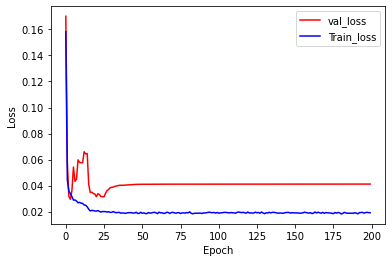

In [50]:
#plt.plot(test_loss,'r',label = 'Test_loss')
plt.plot(val_loss,'r',label = 'val_loss')
plt.plot(train_loss,'b',label = 'Train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

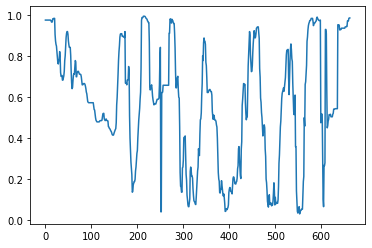

In [51]:
plt.plot(label_y_n1)

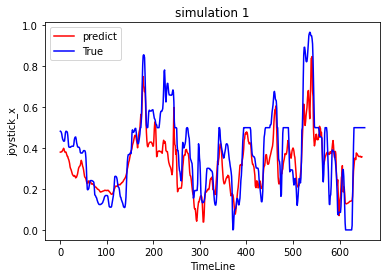

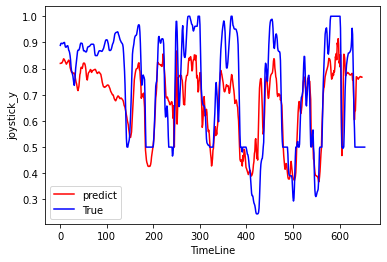

In [52]:
#simul1
plt.figure(1)
plt.title('simulation 1')
plt.plot(model1(train.x_data[:len(df_x1)-15+1].to(device))[:,0].detach().cpu(),'r', label='predict')
plt.plot(df_x_n1[s-1:],'b',label='True')
plt.xlabel('TimeLine')
plt.ylabel('joystick_x')
plt.legend()
plt.figure(2)
plt.plot(model1(train.x_data[:len(df_x1)-15+1].to(device))[:,1].detach().cpu(),'r', label='predict')
plt.plot(df_y_n1[s-1:],'b',label='True')
plt.xlabel('TimeLine')
plt.ylabel('joystick_y')
plt.legend()

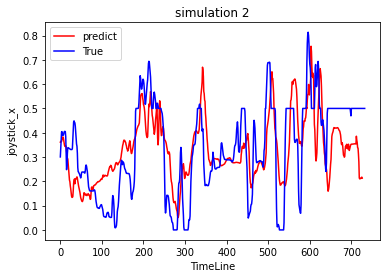

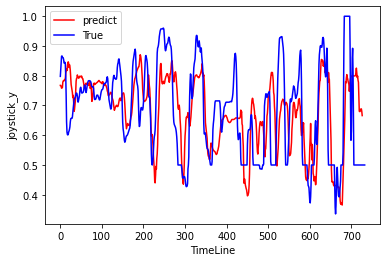

In [53]:
#simul2
plt.figure(1)
plt.title('simulation 2')
plt.plot(model1(train.x_data[len(df_x1)-15+1:len(df_x1)-15+1+len(df_x2)-15+1].to(device))[:,0].detach().cpu(),'r', label='predict')
plt.plot(df_x_n2[s-1:],'b',label='True')
plt.xlabel('TimeLine')
plt.ylabel('joystick_x')
plt.legend()
plt.figure(2)
plt.plot(model1(train.x_data[len(df_x1)-15+1:len(df_x2)-15+1+len(df_x1)-15+1].to(device))[:,1].detach().cpu(),'r', label='predict')
plt.plot(df_y_n2[s-1:],'b',label='True')
plt.xlabel('TimeLine')
plt.ylabel('joystick_y')
plt.legend()

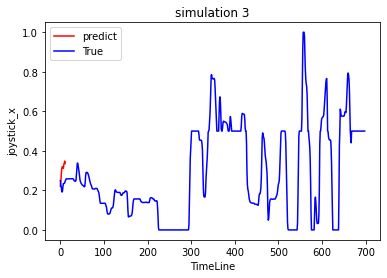

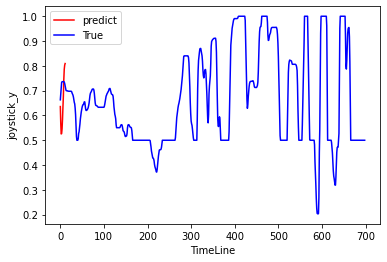

In [54]:
#simul3
plt.figure(1)
plt.title('simulation 3')
plt.plot(model1(train.x_data[len(df_x1)-15+1+len(df_x2)-15+1:].to(device))[:,0].detach().cpu(),'r', label='predict')
plt.plot(df_x_n3[14:],'b',label='True')
plt.xlabel('TimeLine')
plt.ylabel('joystick_x')
plt.legend()
plt.figure(2)
plt.plot(model1(train.x_data[len(df_x1)-15+1+len(df_x2)-15+1:].to(device))[:,1].detach().cpu(),'r', label='predict')
plt.plot(df_y_n3[14:],'b',label='True')
plt.xlabel('TimeLine')
plt.ylabel('joystick_y')
plt.legend()

In [677]:
len(model1(temp_x.to(device))[:,1].detach().cpu())

1388

In [180]:
len(df_y_n[14:])

NameError: name 'df_y_n' is not defined

In [739]:
test.y_data.size()

torch.Size([98, 1, 2])

### 전체 경향성

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


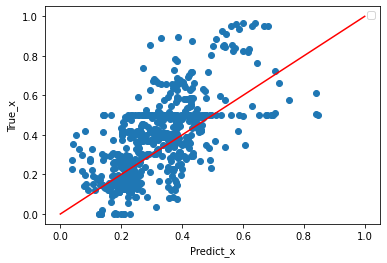

In [55]:
plt.scatter(model1(temp_x[:len(df_x1)-15+1].to(device))[:,0].detach().cpu(),df_x_n1[14:664])
plt.plot([0,1],[0,1],'red')
plt.xlabel('Predict_x')
plt.ylabel('True_x')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


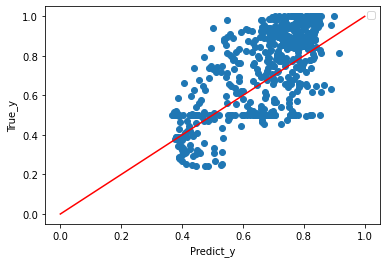

In [56]:
plt.scatter(model1(temp_x[:len(df_x1)-15+1].to(device))[:,1].detach().cpu(),df_y_n1[14:664])
plt.plot([0,1],[0,1],'red')
plt.xlabel('Predict_y')
plt.ylabel('True_y')
plt.legend()

### validation 경향성

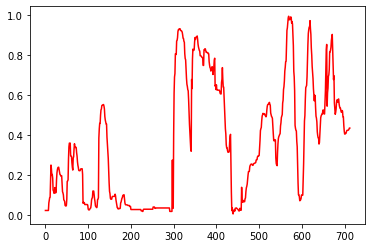

In [720]:
plt.plot(label_x_n3,'r', label='predict')

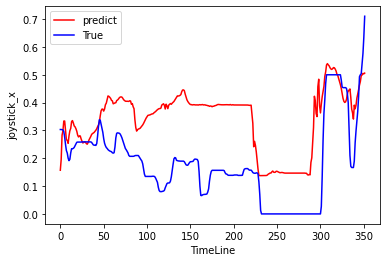

In [777]:
plt.plot(model1(val.x_data.to(device))[:,0].detach().cpu(),'r', label='predict')
plt.plot(val.y_data[:,:,0],'b',label='True')
plt.xlabel('TimeLine')
plt.ylabel('joystick_x')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


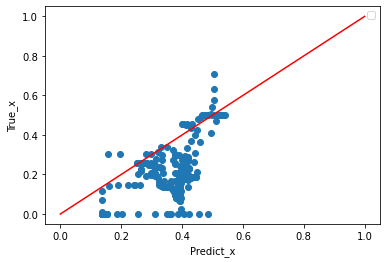

In [778]:
plt.scatter(model1(val.x_data.to(device))[:,0].detach().cpu(),val.y_data[:,:,0])
plt.plot([0,1],[0,1],'red')
plt.xlabel('Predict_x')
plt.ylabel('True_x')
plt.legend()

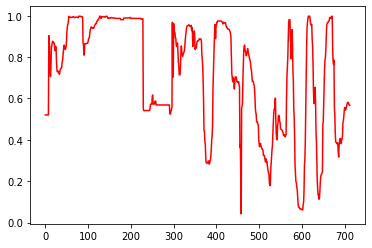

In [779]:
plt.plot(label_y_n3,'r', label='predict')

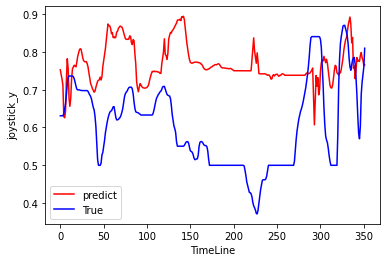

In [780]:
plt.plot(model1(val.x_data.to(device))[:,1].detach().cpu(),'r', label='predict')
plt.plot(val.y_data[:,:,1],'b',label='True')
plt.xlabel('TimeLine')
plt.ylabel('joystick_y')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


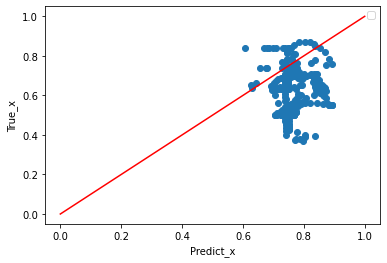

In [781]:
plt.scatter(model1(val.x_data.to(device))[:,1].detach().cpu(),val.y_data[:,:,1])
plt.plot([0,1],[0,1],'red')
plt.xlabel('Predict_x')
plt.ylabel('True_x')
plt.legend()

### testset 경향성

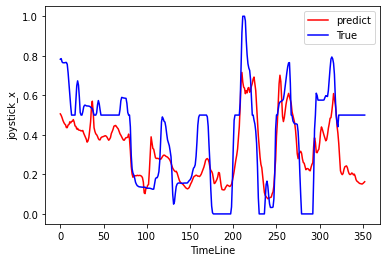

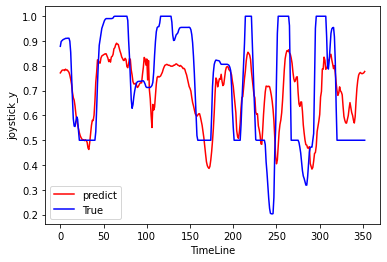

In [799]:
plt.figure(1)
plt.plot(model1(test.x_data.to(device))[:,0].detach().cpu(),'r', label='predict')
plt.plot(test.y_data[:,:,0],'b',label='True')
plt.xlabel('TimeLine')
plt.ylabel('joystick_x')
plt.legend()
plt.figure(2)
plt.plot(model1(test.x_data.to(device))[:,1].detach().cpu(),'r', label='predict')
plt.plot(test.y_data[:,:,1],'b',label='True')
plt.xlabel('TimeLine')
plt.ylabel('joystick_y')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


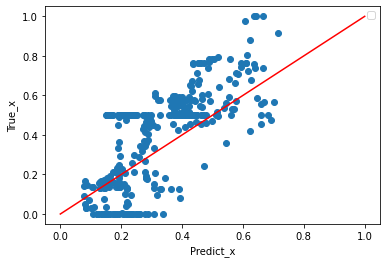

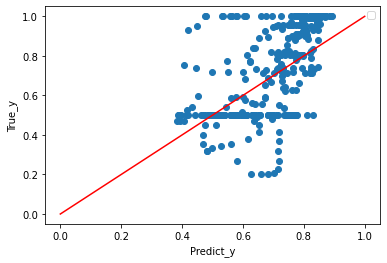

In [801]:
plt.figure(1)
plt.scatter(model1(test.x_data.to(device))[:,0].detach().cpu(),test.y_data[:,:,0])
plt.plot([0,1],[0,1],'red')
plt.xlabel('Predict_x')
plt.ylabel('True_x')
plt.legend()

plt.figure(2)
plt.scatter(model1(test.x_data.to(device))[:,1].detach().cpu(),test.y_data[:,:,1])
plt.plot([0,1],[0,1],'red')
plt.xlabel('Predict_y')
plt.ylabel('True_y')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


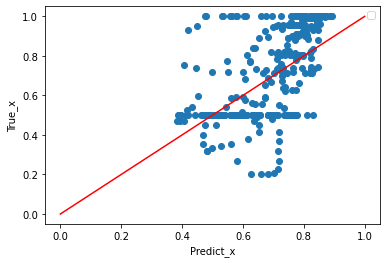

In [785]:
plt.scatter(model1(test.x_data.to(device))[:,1].detach().cpu(),test.y_data[:,:,1])
plt.plot([0,1],[0,1],'red')
plt.xlabel('Predict_x')
plt.ylabel('True_x')
plt.legend()

###  모델저장

In [686]:
PATH = 'C:\song\colonoscopy\weight/'

In [687]:
torch.save(model1, PATH + 'model_CNN_reverse_1lay.pt')
torch.save(model1.state_dict(), PATH + 'model_CNN_reverse_state_dict_1lay.pt')


### model 불러오기

In [356]:
model1.load_state_dict(torch.load(PATH + 'model_CNN_reverse_state_dict.pt'))
model1.to(device)

RuntimeError: Error(s) in loading state_dict for Model:
	size mismatch for fc2.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([216, 512]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([216]).
	size mismatch for fc1.weight: copying a param with shape torch.Size([2, 256]) from checkpoint, the shape in current model is torch.Size([2, 216]).

In [358]:
model1 = torch.load( PATH + 'model_CNN_reverse.pt')